In [4]:
START_POINT = [112.08128471864877, -7.415119677017853]  # Rapah ombo to Puskesmas Perak, approx. 19.5 km
END_POINT = [112.14828108657194, -7.576761025272904] 

CELLTOWER = 'cellTower_Jatim.csv'

In [5]:
import pandas as pd

celltower = pd.read_csv(CELLTOWER)
celltower.drop(columns=['Unnamed: 0'], inplace=True)
celltower

,X,Y
0,112.526779,-8.398495
1,112.539139,-8.402481
2,112.563583,-8.404404
3,112.573462,-8.404549
4,112.576218,-8.409348
...,...,...
134054,114.568906,-7.154476
134055,114.571383,-7.152907
134056,114.600815,-7.143797
134057,114.613541,-7.147915


In [6]:
import matplotlib.pyplot as plt
%matplotlib qt

r = 25000 # in meter

ax = celltower.plot.scatter(x='X', y='Y', figsize=(25,25))
# ax.add_patch(plt.Circle((START_POINT[0], START_POINT[1]), r/111139, color='red', fill=False))
plt.scatter(START_POINT[0], START_POINT[1], color='red')
plt.scatter(END_POINT[0], END_POINT[1], color='yellow')

plt.xlim(START_POINT[0] - (r+1000)/111139, START_POINT[0] + (r+1000)/111139)
plt.ylim(START_POINT[1] - (r+1000)/111139, START_POINT[1] + (r+1000)/111139)
# ax.add_patch(plt.Circle((END_POINT[0], END_POINT[1]), r/111139, color='green', fill=False))

import matplotlib.ticker as plticker

intervals = 200/111139

ax.xaxis.set_major_locator(plticker.MultipleLocator(base=intervals))
ax.yaxis.set_major_locator(plticker.MultipleLocator(base=intervals))
# ax.set_xticklabels([])
# ax.set_yticklabels([])

plt.grid()

In [7]:
import numpy as np

hor_d = np.abs(START_POINT[0] - END_POINT[0])*111139
ver_d = np.abs(START_POINT[1] - END_POINT[1])*111139

grid = np.zeros((np.int8(np.ceil(ver_d/200)), np.int8(np.ceil(hor_d/200))))

In [8]:
rows, cols = grid.shape

In [9]:
START_POINT[0] + 200*38/111139

112.14966755455696

In [10]:
celltower[(celltower['Y'] < START_POINT[1]) & (celltower['Y'] > START_POINT[1] - 200*1/111139) & (celltower['X'] > START_POINT[0]) & (celltower['X'] < START_POINT[0] + 200*1/111139)].empty

True

In [11]:
for row in range(rows):
    for col in range(cols):
        if not celltower[(celltower['Y'] < START_POINT[1] - 200*row/111139) & (celltower['Y'] > START_POINT[1] - 200*(row+1)/111139) & (celltower['X'] > START_POINT[0] + 200*col/111139) & (celltower['X'] < START_POINT[0] + 200*(col+1)/111139)].empty:
            grid[row][col] = 1

In [12]:
grid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

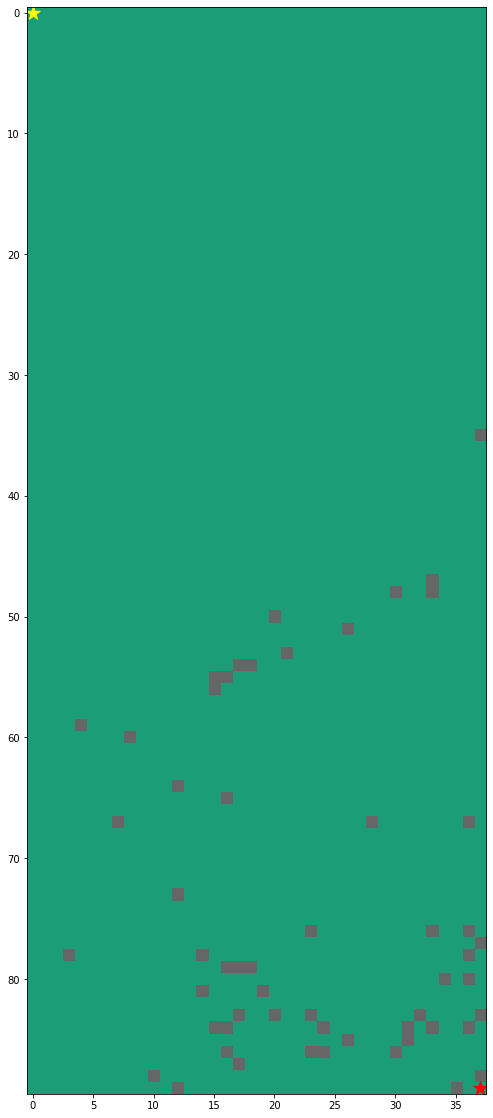

In [13]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(0,0, marker="*", color='yellow', s=200)
ax.scatter(cols-1,rows-1, marker="*", color='red', s=200)

plt.show()

In [14]:
import heapq

def heuristic(a,b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)
    
def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]
    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    heapq.heappush(oheap, (fscore[start], start))
 
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)

        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue

                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
 
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
 
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

  

In [15]:
route = astar(grid, (0,0), (rows-1, cols-1))
route = route[::-1]

In [16]:
x_coords = []
y_coords = []

for i in range(0, len(route)):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

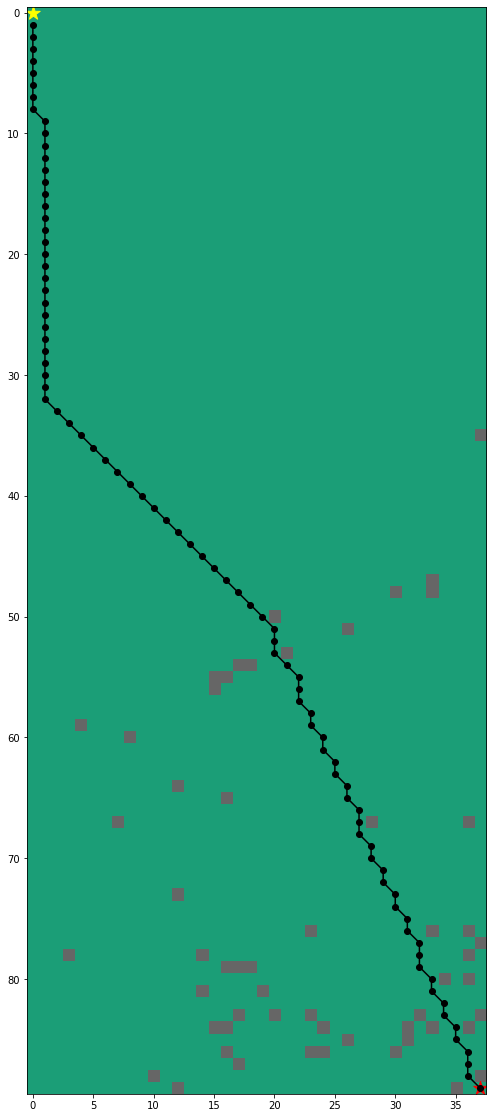

In [17]:
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(0, 0, marker="*", color='yellow', s=200)
ax.scatter(cols-1,rows-1, marker="*", color='red', s=200)

ax.scatter(y_coords, x_coords, color='black')
ax.plot(y_coords, x_coords, color='black')

plt.show()